# Grid search 

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline 

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
score

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [7]:
score.mean()

0.9666666666666668

In [12]:
k_range = list(range(1,31))
kscore = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    kscore.append(score.mean())
kscore

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666,
 0.96,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334]

Text(0, 0.5, 'accuracy estimated using cross validation ')

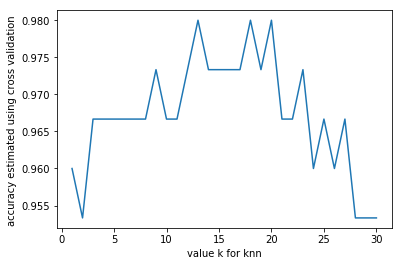

In [13]:
plt.plot(k_range, kscore)
plt.xlabel('value k for knn')
plt.ylabel('accuracy estimated using cross validation ')


# Efficient parameter tuning using GridSearchCV 

Allows us to define a grid of parameters that will be searched using K-fold cross-validation

In [15]:
from sklearn.model_selection import GridSearchCV

In [18]:
#create a parameter grid :  map the parameter names to the values that should be searched 
param_grid = dict(n_neighbors=k_range)
param_grid

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [20]:
#instantiate the grid 
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [21]:
#fit the grid
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [27]:
import pandas as pd 
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007291,0.018042,0.002414,0.001363,1,{'n_neighbors': 1},1.000000,0.933333,1.0,0.933333,0.866667,1.000000,0.866667,1.000000,1.0,1.0,0.960000,0.053333,24
1,0.000448,0.000026,0.000810,0.000040,2,{'n_neighbors': 2},1.000000,0.933333,1.0,0.933333,0.866667,1.000000,0.866667,0.933333,1.0,1.0,0.953333,0.052068,27
2,0.000433,0.000003,0.000798,0.000019,3,{'n_neighbors': 3},1.000000,0.933333,1.0,0.933333,0.866667,1.000000,0.933333,1.000000,1.0,1.0,0.966667,0.044721,12
3,0.000438,0.000008,0.000814,0.000049,4,{'n_neighbors': 4},1.000000,0.933333,1.0,0.933333,0.866667,1.000000,0.933333,1.000000,1.0,1.0,0.966667,0.044721,12
4,0.000436,0.000006,0.000796,0.000008,5,{'n_neighbors': 5},1.000000,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,12
5,0.000435,0.000004,0.000800,0.000007,6,{'n_neighbors': 6},1.000000,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,12
6,0.000434,0.000003,0.000805,0.000011,7,{'n_neighbors': 7},1.000000,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,12
7,0.000434,0.000008,0.000808,0.000006,8,{'n_neighbors': 8},1.000000,0.933333,1.0,1.000000,1.000000,0.866667,0.933333,0.933333,1.0,1.0,0.966667,0.044721,12
8,0.000438,0.000009,0.000817,0.000014,9,{'n_neighbors': 9},1.000000,0.933333,1.0,1.000000,1.000000,0.933333,0.933333,0.933333,1.0,1.0,0.973333,0.032660,4
9,0.000436,0.000006,0.000834,0.000040,10,{'n_neighbors': 10},1.000000,0.933333,1.0,1.000000,1.000000,0.866667,0.933333,0.933333,1.0,1.0,0.966667,0.044721,12


In [28]:
#examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.96


In [29]:
#print the array of mean scores only 
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'cross-validated Accuracy')

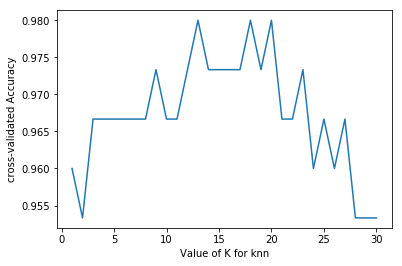

In [30]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for knn')
plt.ylabel('cross-validated Accuracy')

In [31]:
# examine the best model
print(grid.best_score_, grid.best_params_, grid.best_estimator_)

0.98 {'n_neighbors': 13} KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


## Searching multiple parametrs simultaneously 

* best parameter might be achieved when neithere parameter is at default value 

In [32]:
#defining parameter that shoild be searched 
weight_options = ['uniform', 'distance']

In [34]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [35]:
# instansiate tand fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [36]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"


In [38]:
print(grid.best_score_, grid.best_params_)

0.98 {'n_neighbors': 13, 'weights': 'uniform'}


## Using the best parameters to make predictions

In [39]:
# training the model using all data and the best known model
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X,y)

#making prediction out of sample data 
knn.predict([[3,4,5,5]])

array([2])

In [40]:
#Shorcut : GridSeachCV automatically refits the best model using all data 
grid.predict([[3,4,5,5]])

array([2])

# Reducing compuational expense using RandomizedSeachCv
* Seaching many diffrent parameters at once may be computaionally infeasible
* RandommizedSearchCV searches a subset of parameters , and we can control the computational'budget"

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
# specifity "paramter distibutions" rather than "parameter grid"
pram_dist = dict(n_neighbors =k_range, weights = weight_options)

In [51]:
rand = RandomizedSearchCV(knn, pram_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X,y)
pd.DataFrame(rand.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000640,0.000278,0.001088,0.000206,distance,16,"{'weights': 'distance', 'n_neighbors': 16}",1.000000,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.032660,2
1,0.000657,0.000221,0.001213,0.000393,uniform,22,"{'weights': 'uniform', 'n_neighbors': 22}",0.933333,0.933333,1.0,1.000000,1.000000,0.933333,0.933333,0.933333,1.0,1.0,0.966667,0.033333,7
2,0.000745,0.000482,0.001096,0.000433,uniform,18,"{'weights': 'uniform', 'n_neighbors': 18}",1.000000,0.933333,1.0,1.000000,1.000000,0.933333,0.933333,1.000000,1.0,1.0,0.980000,0.030551,1
3,0.000477,0.000068,0.000939,0.000075,uniform,27,"{'weights': 'uniform', 'n_neighbors': 27}",0.933333,0.933333,1.0,1.000000,1.000000,0.866667,0.933333,1.000000,1.0,1.0,0.966667,0.044721,7
4,0.000439,0.000005,0.000886,0.000032,uniform,29,"{'weights': 'uniform', 'n_neighbors': 29}",0.933333,0.933333,1.0,0.933333,1.000000,0.866667,0.933333,0.933333,1.0,1.0,0.953333,0.042687,10
5,0.000442,0.000012,0.000931,0.000111,distance,10,"{'weights': 'distance', 'n_neighbors': 10}",1.000000,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.032660,2
6,0.000487,0.000129,0.000949,0.000143,distance,22,"{'weights': 'distance', 'n_neighbors': 22}",1.000000,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,7
7,0.000436,0.000002,0.000833,0.000008,uniform,14,"{'weights': 'uniform', 'n_neighbors': 14}",1.000000,0.933333,1.0,1.000000,1.000000,0.866667,0.933333,1.000000,1.0,1.0,0.973333,0.044222,2
8,0.000438,0.000005,0.000866,0.000009,distance,12,"{'weights': 'distance', 'n_neighbors': 12}",1.000000,0.933333,1.0,1.000000,0.866667,1.000000,0.933333,1.000000,1.0,1.0,0.973333,0.044222,2
9,0.000437,0.000006,0.000835,0.000007,uniform,15,"{'weights': 'uniform', 'n_neighbors': 15}",0.933333,0.933333,1.0,1.000000,1.000000,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.032660,2


In [52]:
# examine the best model 
print(rand.best_score_, rand.best_params_)

0.98 {'weights': 'uniform', 'n_neighbors': 18}


In [ ]:
# run RandomizedSearchCV 15 times with n_iter=10 and record the best score
best_score = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, pram_dist, cv=10, scoring='accuracy', n_iter=10, return_train_score=False)
    rand.fit(X,y)
    best_score.append(round(rand.best_score_, 3))
print(best_score)